In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exercise 1

Load the tips dataset from either pydataset or seaborn.

In [78]:
# import data from pydataset
from pydataset import data

df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## Exercise 2

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [79]:
# drop rows to create df of only the target variable and independent variable listed in the exercise description
df = df.drop(columns=['sex','smoker','day','time','size'])
df.head()

,total_bill,tip
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61


In [80]:
# create another column with the baseline prediction
df['baseline'] = df.tip.mean()
df.head(2)

,total_bill,tip,baseline
1,16.99,1.01,2.998279
2,10.34,1.66,2.998279


In [81]:
# fit the model
model = LinearRegression().fit(df[['total_bill']], df['tip'])
# add column with predicted values
df['yhat'] = model.predict(df[['total_bill']])
df.head()

,total_bill,tip,baseline,yhat
1,16.99,1.01,2.998279,2.704636
2,10.34,1.66,2.998279,2.006223
3,21.01,3.50,2.998279,3.126835
4,23.68,3.31,2.998279,3.407250
5,24.59,3.61,2.998279,3.502822


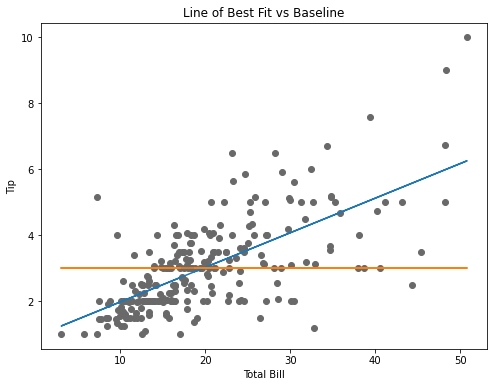

In [82]:
# plot the line of best fit and baseline
plt.figure(figsize=(8, 6))

# Plot regression line
plt.plot(df.total_bill, df.yhat)

# Plot the data points
plt.scatter(df.total_bill, df.tip, color='dimgray')

# add title
plt.title('Line of Best Fit vs Baseline')

# add axes labels
plt.ylabel('Tip')
plt.xlabel('Total Bill')
    
# add baseline
plt.plot(df.total_bill, df.baseline)

plt.show()

## Exercise 3

Plot the residuals for the linear regression model that you made.

In [83]:
# calculate residuals for both baseline and linear regression model
df['residual'] = df.yhat - df.tip
df['baseline_residual'] = df.baseline - df.tip
df.head(3)

,total_bill,tip,baseline,yhat,residual,baseline_residual
1,16.99,1.01,2.998279,2.704636,1.694636,1.988279
2,10.34,1.66,2.998279,2.006223,0.346223,1.338279
3,21.01,3.50,2.998279,3.126835,-0.373165,-0.501721


In [75]:
df.residual.sum(), df.baseline_residual.sum()

(-8.171241461241152e-14, 2.4868995751603507e-14)

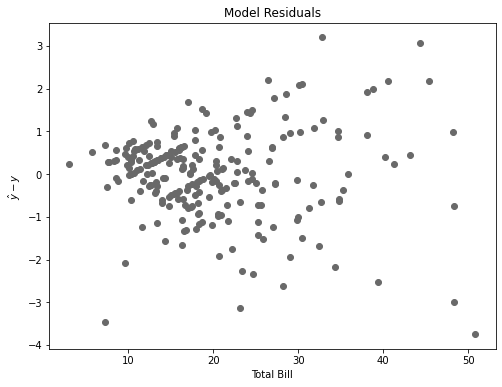

In [84]:
# plot residuals for linear regression model
plt.figure(figsize=(8, 6))
plt.scatter(df.total_bill, df.residual, color='dimgray')

# set titles
plt.title('Model Residuals', fontsize=12, color='black')
# add axes labels
plt.ylabel(r'$\hat{y}-y$')
plt.xlabel('Total Bill')

plt.show()

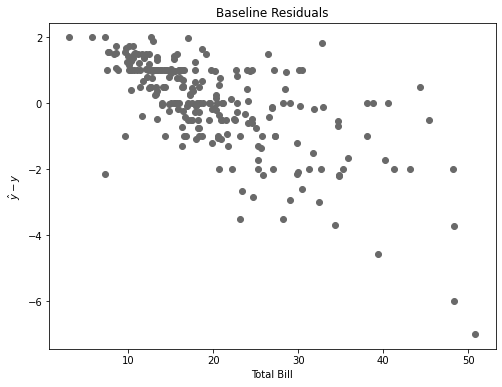

In [85]:
# plot residuals for baseline
plt.figure(figsize=(8, 6))
plt.scatter(df.total_bill, df.baseline_residual, color='dimgray')

# set titles
plt.title('Baseline Residuals', fontsize=12, color='black')
# add axes labels
plt.ylabel(r'$\hat{y}-y$')
plt.xlabel('Total Bill')

plt.show()

## Exercise 4

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### Sum of Squared Errors

In [86]:
# square the residuals then sum

df['residual_sq'] = df.residual**2

SSE = df.residual_sq.sum()

print(f'SSE is {SSE}')

SSE is 252.788743850776


### Explained Sum of Squares

In [87]:
# calculate explained sum of squares
ESS = ((df.yhat - df.tip.mean())**2).sum()
print(f'ESS is {ESS}')

ESS is 212.4237331984042


### Total Sum of Squares

In [88]:
# calculate total sum of squares
TSS = ESS + SSE
TSS2 = ((df.tip - df.tip.mean())**2).sum()
print(TSS)
print(f'TSS is equal to TSS2: {round(TSS,2)==round(TSS2,2)}')

465.21247704918017
TSS is equal to TSS2: True


### Mean Squared Error

In [60]:
# calculate mean squared error
MSE = SSE/len(df)
print(f'MSE is {MSE}')

MSE is 1.036019442011377


### Root Mean Squared Error

In [61]:
# calculate root mean squared error
RMSE = sqrt(MSE)
print(f'RMSE is {RMSE}')

RMSE is 1.0178504025697377


## Exercise 5

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

### Sum of Squared Errors

In [48]:
# square the residuals then sum for baseline

df['baseline_residual_sq'] = df.baseline_residual**2

baseline_SSE = df.baseline_residual_sq.sum()

print(f'Baseline SSE is {baseline_SSE}')

Baseline SSE is 465.2124770491804


### Mean Squared Error

In [59]:
# calculate mean squared error for baseline
baseline_MSE = baseline_SSE/len(df)
print(f'Baseline MSE is {baseline_MSE}')

Baseline MSE is 1.906608512496641


### Root Mean Squared Error

In [62]:
# calculate root mean squared error for baseline
baseline_RMSE = sqrt(baseline_MSE)
print(f'Baseline RMSE is {baseline_RMSE}')

Baseline RMSE is 1.3807999538298954


## Exercise 6

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [63]:
# Output whether model performs better than baseline
if SSE < baseline_SSE:
    print(f'Model SSE ({SSE}) is less than baseline SSE ({baseline_SSE}) therefore performs better than the baseline model')
else:
    print(f'Model SSE ({SSE}) is greater than baseline SSE ({baseline_SSE}) therefore does not perform better than the baseline model')

Model SSE (252.788743850776) is less than baseline SSE (465.2124770491804) therefore performs better than the baseline model


## Exercise 7

What is the amount of variance explained in your model?

In [99]:
# Calculate R2
R_squared = ESS/TSS
R_squared
print(f'R_squared is {R_squared}')

R_squared is 0.4566165863516763


In [101]:
# Calculate R2 w/sklearn
r2_score(df.tip, df.yhat)

0.45661658635167657

## Exercise 8

Is your model better than the baseline model?

# Yes, see exercise 6

## Exercise 9

Create a file named evaluate.py that contains the following functions:
 - plot_residuals(y, yhat): creates a residual plot
 - regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [104]:
# create function that plots residuals
def plot_residuals(y, yhat): 
    # creates a residual plot

    plt.figure(figsize=(8, 6))
    plt.scatter(y, yhat-y, color='dimgray')

    # set titles
    plt.title('Actual vs. Residuals', fontsize=12, color='black')
    # add axes labels
    plt.ylabel(r'$\hat{y}-y$')
    plt.xlabel('$y$')

    plt.show()

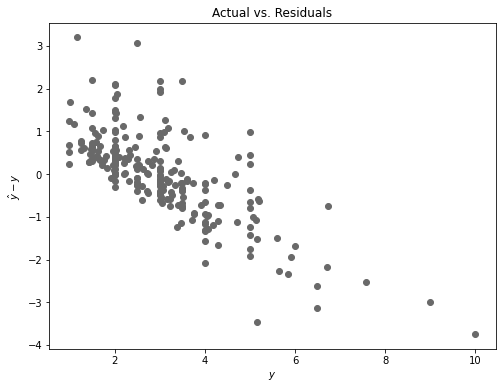

In [105]:
# check function
plot_residuals(df.tip, df.yhat)

In [108]:
# create function that returns regression errors
def regression_errors(y, yhat): 
    # returns the following values
    return pd.Series({
    'SSE' : mean_squared_error(y, yhat)*len(y),
    'ESS' : ((yhat - y.mean())**2).sum(),
    'TSS' : ESS + SSE,
    'MSE' : mean_squared_error(y, yhat),
    'RMSE' : sqrt(mean_squared_error(y, yhat)),
    })

In [109]:
# check function
regression_errors(df.tip, df.yhat)

SSE     252.788744
ESS     212.423733
TSS     465.212477
MSE       1.036019
RMSE      1.017850
dtype: float64

In [125]:
# create function that returns mean errors for baseline model
def baseline_mean_errors(y): 
    # computes the SSE, MSE, and RMSE for the baseline model
    yhat = y.mean()
    return pd.Series({
    'SSE' : ((yhat-y)**2).sum(),
    'MSE' : ((yhat-y)**2).sum()/len(y),
    'RMSE' : sqrt(((yhat-y)**2).sum()/len(y))
    })

In [126]:
# check function
baseline_mean_errors(df.tip)

SSE     465.212477
MSE       1.906609
RMSE      1.380800
dtype: float64

In [127]:
# create function that checks if your model is better than the baseline
def better_than_baseline(y, yhat): 
    # returns true if your model performs better than the baseline, otherwise false
    baseline = y.mean()
    rmse_baseline = sqrt(((baseline - y)**2).sum()/len(y))
    rmse_model = sqrt(mean_squared_error(y, yhat))
    return rmse_model < rmse_baseline

In [128]:
# check function
better_than_baseline(df.tip, df.yhat)

True

## Exercise 10

Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [129]:
# pull in mpg dataset
mpg = data('mpg')

In [131]:
# view first few rows
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [132]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(mpg[['displ']], mpg.hwy)

# make prediction
mpg['predictions'] = lm.predict(mpg[['displ']])
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,predictions
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002


In [133]:
# use function to review regression errors
regression_errors(mpg.hwy, mpg.predictions)

SSE     3413.829009
ESS     4847.833384
TSS      465.212477
MSE       14.589013
RMSE       3.819557
dtype: float64

In [134]:
# use function to review baseline mean errors
baseline_mean_errors(mpg.hwy)

SSE     8261.662393
MSE       35.306250
RMSE       5.941906
dtype: float64

In [135]:
# use function to check if the model is better than the baseline
better_than_baseline(mpg.hwy, mpg.predictions)

True